### Semisupervised Learning

Some algorithms can deal with partially labeled training data, usually a lot of unlabeled data and a little bit of labeled data. This is called semisupervised learning. Some photo-hosting services, such as Google Photos, are good examples of this. Once you upload all your family photos to the service, it automatically recognizes that the same person A shows up in photos 1, 5, and 11, while another person B shows up in photos 2, 5, and 7. This is the unsupervised part of the algorithm (clustering). Now all the system needs is for you to tell it who these people are. Just one label per person,4 and it is able to name everyone in every photo, which is useful for searching photos.

### Scikit-Learn Cheatsheet

![](images/cheatsheet.jpg)

### Preprocessing: Handling Missing Data



In [1]:
import numpy as np
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])


from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

### Preprocessing: Transforming 1-D array into Higher Dimensional Array

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.]])

In [5]:
# Now you can use this for polynomial regression
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

### Handling Categorical Data

In [1]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


As we can see in the preceding output, the newly created DataFrame contains a nominal feature (color), an ordinal feature (size), and a numerical feature (price) column. The class labels (assuming that we created a dataset for a supervised learning task) are stored in the last column.

#### Mapping Ordinal Features

Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M. In contrast, nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

In [2]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [3]:
inv_size_mapping ={k:v for v,k in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
inv_size_mapping


{1: 'M', 2: 'L', 3: 'XL'}

In [4]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization. Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if you don’t want 0–1 for some reason. Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called `StandardScaler` for standardization.

Following is from Sebastian's book - 

The importance of feature scaling can be illustrated by a simple example. Let us assume we have 2 features where one feature is measured on a scale of 1 to 10 while other is measured on the scale of 1 to 10,000. When we think of the squared error function in Adaline, it is intuitive to say that the algorithm would mostly be busy with optimizing the weights accroding to the larger errors in feature 2. Another example is KNN with a Euclidean distance measure; the computed distances between samples will be dominated by second feature axis.

Now there are two common approaches to bringing different features onto the same scale: normalization and standardization. Those terms are often used quite loosely in different fields, and the meaning has to be derived from the context. Most often,
normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. To normalize our data, we can simply apply the min-max scaling to each feature column, where the new value (i) norm x of a sample x(i)
can be calculated as follows:

$x_{(norm)}^{i} =  \frac{x^i-x_{min}}{x_{max}-x_{min}}$

Here, x(i) is a particular sample, min x is the smallest value in a feature column,
and max x the largest value, respectively.

The procedure for standardization can be expressed as follows: -

$x_{std}^{i} =  \frac{(x^{i}-\mu_x)}{(\sigma_{x})}$

### Precision and Recall
$$
Precision = \frac{TP}{(TP+FP)}
$$
$$
Recall = \frac{TP}{(TP+FN)}
$$

TP is the number of true positives, and FP is the number of false positives. A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one
positive instance. So precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier. FN is of course the number of false negatives.

Suppose a picture has 12 dogs and 4 cats in it. A program identifies 8 dogs in it but in reality, there are only 5 dogs in those identified 8 dogs. 

This means that **Precision Score** will be 5/8. Precision implies how correct/useful our program is. 

Similarily **Recall Score** would be 5/12. Recall implies how complete our program is. 

### Type I and Type II Errors

**Type I Error** is the number of false positives which in above case is (8-5) = 3 as program wrongly identified 3 cats as dogs.

**Type II Error** is the number of false negatives which in above case is (12-5) =  7 as program rejected 7 dogs because it thought they weren't dog but they actually were.  

### Sensitivity and Specificity
$$
Sensitivity = \frac{TP}{TP+FN}
$$

$$
Specificity = \frac{TN}{TN+FP}
$$

Note that **Sensitivity equals to Recall.** 
<img src="images/sensitivity.png" width="300" height="500"/>

**Sensitivity** will be 5/12 as it equals to **Recall**

**Specificity** will be 1/(1+3) = 1/4

![](images/precision.png)

The above image is an illustration of the case where our estimator tries to identify digit  '5' among hand written digits smaples. 

### F-1 Score

$$F1 = \frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}$$

To compute the F1 score, simply call the f1_score() function:
```python
>>> from sklearn.metrics import f1_score
>>> f1_score(y_train_5, y_pred)
0.78468208092485547
```

### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR is also called specificity. **Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.**

To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the `roc_curve()` function:

```python
>>>from sklearn.metrics import roc_curve
>>>fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
```

![](images/roc.png)

### Curse of Dimensionality

The common theme of dimensionality related problems is that when the dimensionality increases, the volume of the space increases so fast  that the available data become sparse. This sparsity is problemetic for any method that requires statistical significance. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality. 

If there is only one feature, then it may be possible that only 10 observations are needed. But as the numbers of features grow (i.e. dimensionality increases), the same amount of data become more and more sparse and the need for data grows exponentially. (from Wikipedia)

For an estimator to be effective, you need the distance between neighboring points to be less than some value 𝑑, which depends on the problem. In one dimension, this requires on average 𝑛 ∼ 1/𝑑 points. In the context of the above 𝑘-NN example, if the data is described by just one feature with values ranging from 0 to 1 and with 𝑛 training observations, then new data will be no further away than 1/𝑛. Therefore, the nearest neighbor decision rule will be efficient as soon as 1/𝑛 is small compared to the scale of between-class feature variations. If the number of features is 𝑝, you now require 𝑛 ∼ 1/𝑑𝑝 points. Let’s say that we require 10 points in one dimension: now 10𝑝 points are required in 𝑝 dimensions to pave the [0, 1] space. As 𝑝 becomes large, the number of training points required for a good estimator grows exponentially. For example, if each point is just a single number (8 bytes), then an effective 𝑘-NN estimator in a paltry 𝑝 ∼ 20 dimensions would require more training data than the current estimated size of the entire internet (}1000 Exabytes or so). This is called the curse of dimensionality and is a core problem that machine learning addresses. (from Documentation)


<div class="alert alert alert-block alert-warning"> When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge. In general, we should use feature scaling in KNN, K-Means, logistic regression, SVM, NN, PCA. The only possible exception where feature scaling is not needed is Dicision Trees.</div>

[ 3.74540119  9.50714306  7.31993942  5.98658484]
[  7.22926896  18.18565441  13.52423055  10.67206599]


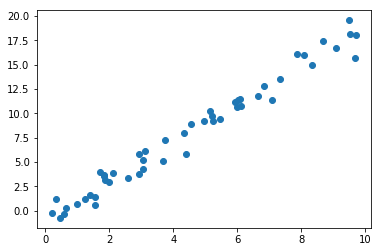

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
print(x[:4])
print(y[:4])

In [49]:
m = -1
b= 0
sum = 0
for X,Y in zip(x,y):
    a = (Y -((m*X)+b))**2
    sum = sum + a
print(sum/50)


226.471717283


In [59]:
import numpy as np
XX,YY = np.meshgrid(x,y)


### Plotting of Error Curve



In [55]:
m = np.linspace(0,1,50)  #values for slope
b = np.linspace(-2,3,50) #values for intercept

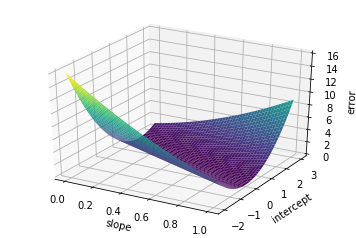

In [62]:
M,B= np.meshgrid(m,b)
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

a =(2 -((M*2)+B))**2  #value of x and y have been set to 2. 'a' is a error function

ax.set_xlabel('slope')
ax.set_ylabel('intercept')
ax.set_zlabel('error')
ax.plot_surface(M, B, a,  rstride=1, cstride=1, cmap='viridis')


## Comparison of Various Classification with Different Datasets

C:\miniconda3\envs\data\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\miniconda3\envs\data\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\miniconda3\envs\data\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


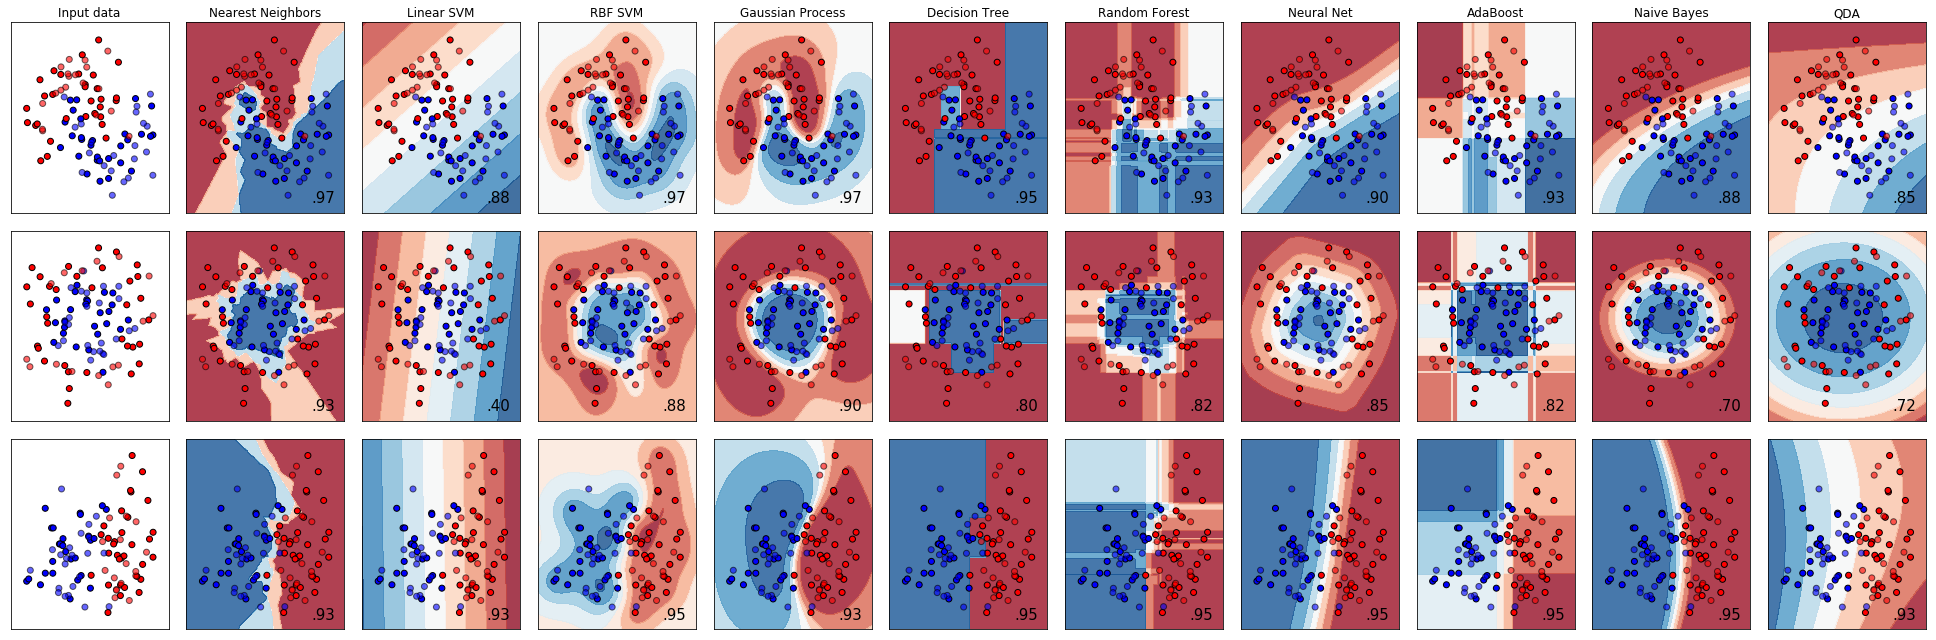

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02 # step size in the mesh
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
"Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
"Naive Bayes", "QDA"]

classifiers = [
KNeighborsClassifier(3),
SVC(kernel="linear", C=0.025),
SVC(gamma=2, C=1),
GaussianProcessClassifier(1.0 * RBF(1.0)),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
MLPClassifier(alpha=1),
AdaBoostClassifier(),
GaussianNB(),
QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
# preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
# just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
# Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
# iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
# Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
# and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1
plt.tight_layout()